In [1]:
import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


# Data

In [2]:
train_data = torchvision.datasets.MNIST("./data", \
                                        train=True, \
                                        transform=transforms.ToTensor(), \
                                        download=True)

test_data = torchvision.datasets.MNIST("./data", \
                                       train=False, \
                                       transform=transforms.ToTensor(), \
                                       download=True)


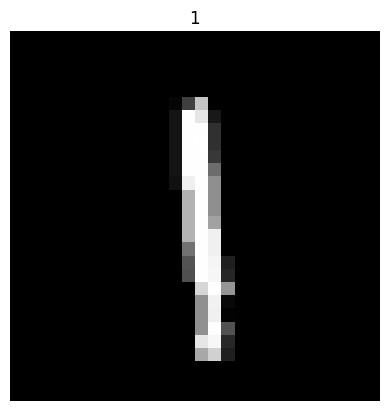

In [3]:
np_image = train_data[8][0].numpy()

plt.imshow(np_image[0,:,:], cmap="gray")
plt.title(train_data[8][1])
plt.axis('off')
plt.show()

In [17]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64)

# Initial architecture
##### 28x28 => 150 -> 10

In [5]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(28*28, 150)
        self.layer2 = nn.Linear(150, 10)
        self.relu = nn.ReLU()
    def forward(self, x):
        l = self.relu(self.layer1(x))
        return self.layer2(l)

net = Net()
opt = optim.SGD(net.parameters(), 0.01)
loss_fn = nn.MSELoss()
losses = []
accuracies = [0.1]

0 tensor(0.5814)
1 tensor(0.7794)
2 tensor(0.8141)
3 tensor(0.8343)
4 tensor(0.8467)
5 tensor(0.8572)
6 tensor(0.8655)
7 tensor(0.8727)
8 tensor(0.8787)
9 tensor(0.8838)


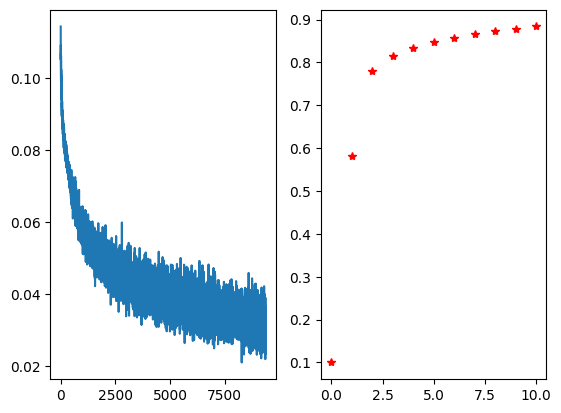

In [6]:
for epoch in range(10):
    total_correct = 0
    total = len(train_data)
    for images, labels in train_loader:
        images_reshaped = images.reshape(-1, 28*28)
        hot_predictions = net(images_reshaped)
        predictions = hot_predictions.argmax(axis=1)
        nb_correct = sum(predictions == labels)
        total_correct += nb_correct
        hot_labels = F.one_hot(labels, 10).to(torch.float32)
        loss = loss_fn(hot_labels, hot_predictions)
        loss.backward()
        losses.append(loss.item())
        opt.step()
        opt.zero_grad()
    acc = total_correct/total
    accuracies.append(acc.item())
    print(epoch, acc)
plt.subplot(1,2,1)
plt.plot(losses)
plt.subplot(1,2,2)
plt.plot(accuracies, "*r")
plt.show()

# Adding width
##### 28x28 => 300 -> 10

In [7]:
class Net(nn.Module):
    def __init__(self, n_hidden=150):
        super().__init__()
        self.layer1 = nn.Linear(28*28, n_hidden)
        self.layer2 = nn.Linear(n_hidden, 10)
        self.relu = nn.ReLU()
    def forward(self, x):
        l = self.relu(self.layer1(x))
        return self.layer2(l)

net = Net(300)
opt = optim.SGD(net.parameters(), 0.01)
loss_fn = nn.MSELoss()
losses = []
accuracies = [0.1]

0 tensor(0.6008)
1 tensor(0.7857)
2 tensor(0.8219)
3 tensor(0.8420)
4 tensor(0.8551)
5 tensor(0.8651)
6 tensor(0.8732)
7 tensor(0.8794)
8 tensor(0.8850)
9 tensor(0.8903)


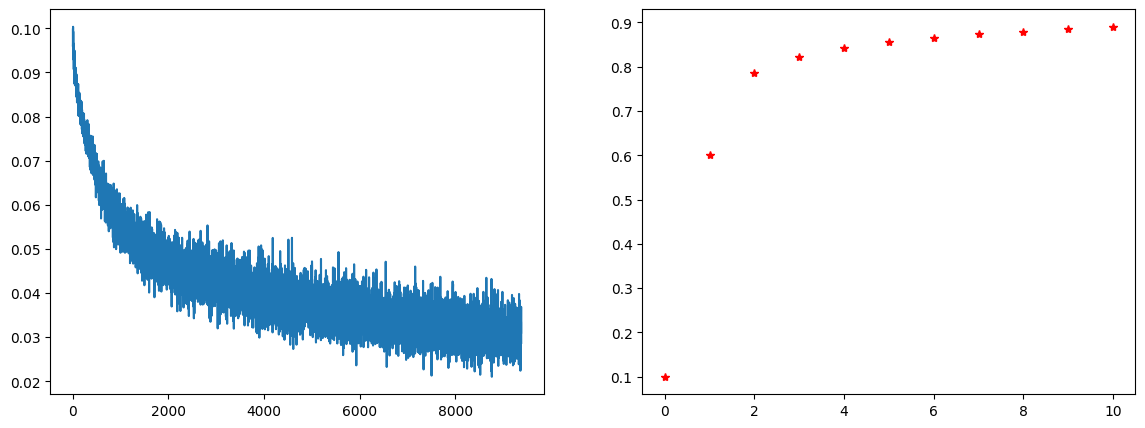

In [8]:
for epoch in range(10):
    total_correct = 0
    total = len(train_data)
    for images, labels in train_loader:
        images_reshaped = images.reshape(-1, 28*28)
        hot_predictions = net(images_reshaped)
        predictions = hot_predictions.argmax(axis=1)
        nb_correct = sum(predictions == labels)
        total_correct += nb_correct
        hot_labels = F.one_hot(labels, 10).to(torch.float32)
        loss = loss_fn(hot_labels, hot_predictions)
        loss.backward()
        losses.append(loss.item())
        opt.step()
        opt.zero_grad()
    acc = total_correct/total
    accuracies.append(acc.item())
    print(epoch, acc)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(losses)
plt.subplot(1,2,2)
plt.plot(accuracies, "*r")
plt.show()

# Adding depth
##### 28x28 ≡> 150 => 50 -> 10


In [9]:
class Net(nn.Module):
    def __init__(self, n_hidden1=150, n_hidden2=50):
        super().__init__()
        self.layer1 = nn.Linear(28*28, n_hidden1)
        self.layer2 = nn.Linear(n_hidden1, n_hidden2)
        self.layer3 = nn.Linear(n_hidden2, 10)
        self.relu = nn.ReLU()
    def forward(self, x):
        l1 = self.relu(self.layer1(x))
        l2 = self.relu(self.layer2(l1))
        return self.layer3(l2)

net = Net(300)
opt = optim.SGD(net.parameters(), 0.01)
loss_fn = nn.MSELoss()
losses = []
accuracies = [0.1]

0 tensor(0.2957)
1 tensor(0.6494)
2 tensor(0.7496)
3 tensor(0.7921)
4 tensor(0.8166)
5 tensor(0.8311)
6 tensor(0.8403)
7 tensor(0.8482)
8 tensor(0.8551)
9 tensor(0.8610)


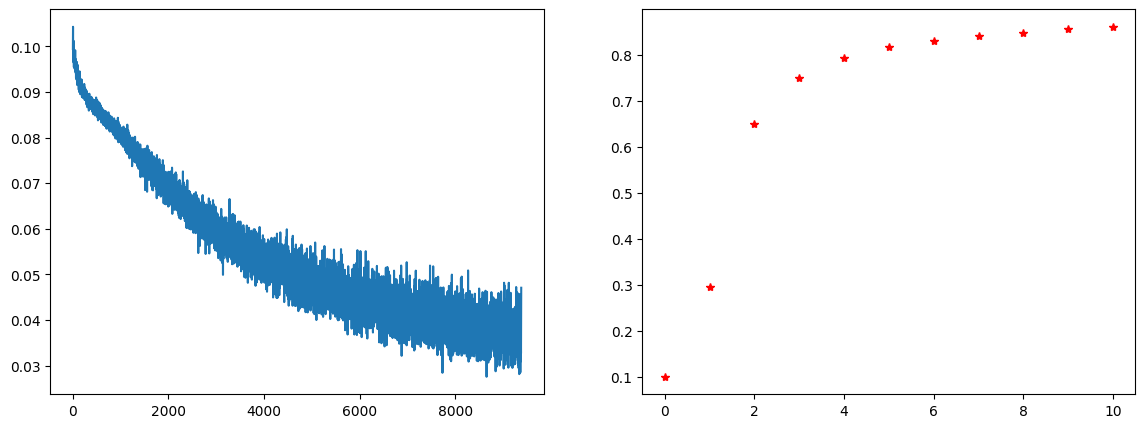

In [10]:
for epoch in range(10):
    total_correct = 0
    total = len(train_data)
    for images, labels in train_loader:
        images_reshaped = images.reshape(-1, 28*28)
        hot_predictions = net(images_reshaped)
        predictions = hot_predictions.argmax(axis=1)
        nb_correct = sum(predictions == labels)
        total_correct += nb_correct
        hot_labels = F.one_hot(labels, 10).to(torch.float32)
        loss = loss_fn(hot_labels, hot_predictions)
        loss.backward()
        losses.append(loss.item())
        opt.step()
        opt.zero_grad()
    acc = total_correct/total
    accuracies.append(acc.item())
    print(epoch, acc)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(losses)
plt.subplot(1,2,2)
plt.plot(accuracies, "*r")
plt.show()

# Adding SoftMax

In [11]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(28*28, 150)
        self.layer2 = nn.Linear(150, 10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        l = self.relu(self.layer1(x))
        return F.softmax(self.layer2(l), dim=1)

net = Net() 
opt = optim.SGD(net.parameters(), 0.01)
loss_fn = nn.MSELoss()
losses = []
accuracies = [0.1]

0 tensor(0.1757)
1 tensor(0.2600)
2 tensor(0.3157)
3 tensor(0.3870)
4 tensor(0.4293)
5 tensor(0.4585)
6 tensor(0.5071)
7 tensor(0.5606)
8 tensor(0.5940)
9 tensor(0.6240)


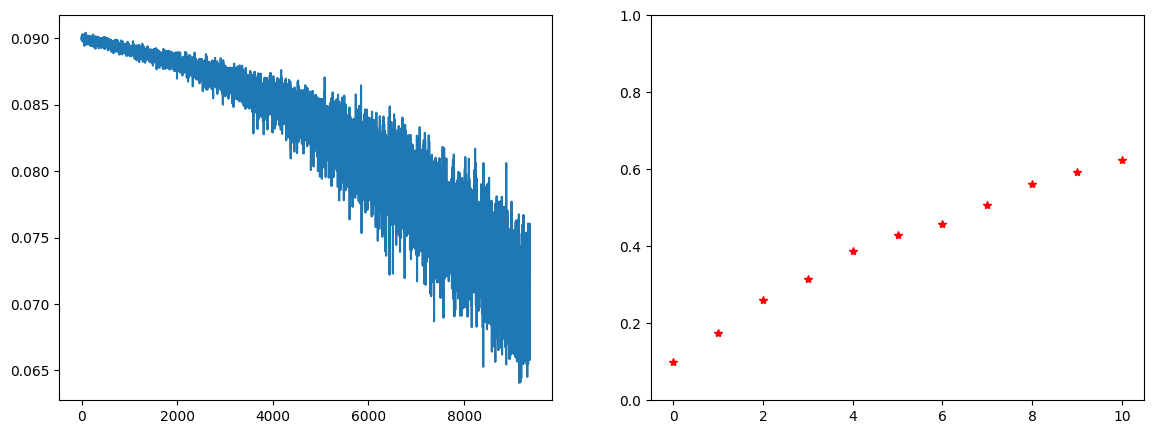

In [12]:
for epoch in range(10):
    total_correct = 0
    total = len(train_data)
    for images, labels in train_loader:
        images_reshaped = images.reshape(-1, 28*28)
        hot_predictions = net(images_reshaped)
        predictions = hot_predictions.argmax(axis=1)
        nb_correct = sum(predictions == labels)
        total_correct += nb_correct
        hot_labels = F.one_hot(labels, 10).to(torch.float32)
        loss = loss_fn(hot_labels, hot_predictions)
        loss.backward()
        losses.append(loss.item())
        opt.step()
        opt.zero_grad()
    acc = total_correct/total
    accuracies.append(acc.item())
    print(epoch, acc)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(losses)
plt.subplot(1,2,2)
plt.plot(accuracies, "*r")
plt.ylim(0,1)
plt.show()

# Convolutional layers

In [13]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Conv2d(1, 8, 5)
        self.layer2 = nn.Linear(4608, 10)
        self.relu = nn.ReLU()
    def forward(self, x):
        l = self.relu(self.layer1(x))
        l = l.reshape(-1, 4608)
        return F.softmax(self.layer2(l), dim=1)

net = Net()
opt = optim.SGD(net.parameters(), 0.1)
loss_fn = nn.MSELoss()
losses = []
accuracies = [0.1]

0 tensor(0.7823)
1 tensor(0.9016)
2 tensor(0.9094)
3 tensor(0.9155)
4 tensor(0.9199)
5 tensor(0.9241)
6 tensor(0.9284)
7 tensor(0.9323)
8 tensor(0.9371)
9 tensor(0.9411)


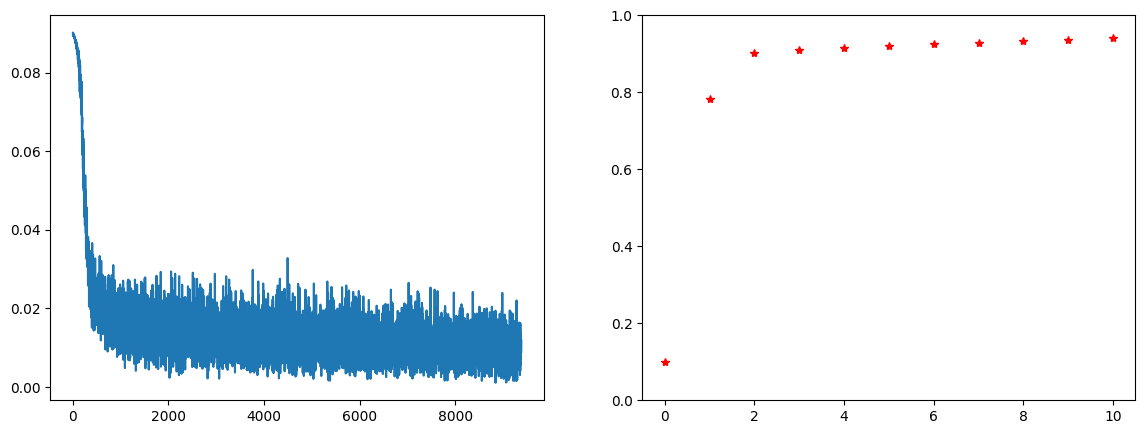

In [14]:
for epoch in range(10):
    total_correct = 0
    total = len(train_data)
    for images, labels in train_loader:
        hot_predictions = net(images)
        predictions = hot_predictions.argmax(axis=1)
        nb_correct = sum(predictions == labels)
        total_correct += nb_correct
        hot_labels = F.one_hot(labels, 10).to(torch.float32)
        loss = loss_fn(hot_labels, hot_predictions)
        loss.backward()
        losses.append(loss.item())
        opt.step()
        opt.zero_grad()
    acc = total_correct/total
    accuracies.append(acc.item())
    print(epoch, acc)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(losses)
plt.subplot(1,2,2)
plt.plot(accuracies, "*r")
plt.ylim(0,1)
plt.show()

## Before that, I would like you do the following:
- create a network with at least 2 convolutional layers (and train it!)
- compute the accuracy of you new network on the test set

In [34]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Conv2d(1, 8, 5)
        self.layer2 = nn.Conv2d(8, 16, 5)
        self.layer3 = nn.Linear(6400, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        l1 = self.relu(self.layer1(x))
        l2 = self.relu(self.layer2(l1))
        l2 = l2.reshape(-1, 6400)
        return F.softmax(self.layer3(l2), dim=1)

net = Net()
opt = optim.SGD(net.parameters(), 0.1)
loss_fn = nn.MSELoss()
losses = []
accuracies = [0.1]

0 tensor(0.9797)


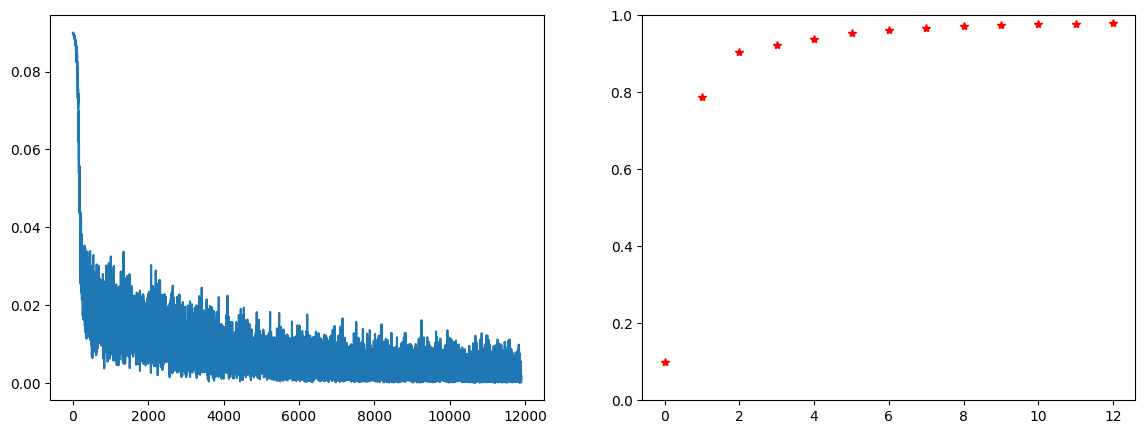

In [36]:
for epoch in range(1):
    total_correct = 0
    total = len(train_data)
    for images, labels in train_loader:
        hot_predictions = net(images)
        predictions = hot_predictions.argmax(axis=1)
        nb_correct = sum(predictions == labels)
        total_correct += nb_correct
        hot_labels = F.one_hot(labels, 10).to(torch.float32)
        loss = loss_fn(hot_labels, hot_predictions)
        loss.backward()
        losses.append(loss.item())
        opt.step()
        opt.zero_grad()
    acc = total_correct/total
    accuracies.append(acc.item())
    print(epoch, acc)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(losses)
plt.subplot(1,2,2)
plt.plot(accuracies, "*r")
plt.ylim(0,1)
plt.show()

In [37]:

total_correct = 0
total = len(test_data)
for images, labels in test_loader:
    hot_predictions = net(images)
    predictions = hot_predictions.argmax(axis=1)
    nb_correct = sum(predictions == labels)
    total_correct += nb_correct

acc = total_correct/total
print(acc)

tensor(0.9787)
